<a href="https://colab.research.google.com/github/sumit-sharma908/Airbnb-NYC-2019/blob/main/Copy_of_Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

# Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = ('/content/drive/MyDrive/')

# Importing Dataset From Drive

In [ ]:
df = pd.read_csv('/Airbnb NYC 2019.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Taking Necessary Columns Only

In [ ]:
new_df = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365','last_review']]
new_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,last_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365,2018-10-19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,2019-05-21
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194,2019-07-05
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0,2018-11-19


# 1. What can we learn about different hosts and areas?

In [ ]:
hosts_areas = new_df.groupby(['host_id','host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(10)


,host_id,host_name,neighbourhood_group,calculated_host_listings_count
34740,219517861,Sonder (NYC),Manhattan,327
29480,107434423,Blueground,Brooklyn,232
29481,107434423,Blueground,Manhattan,232
19626,30283594,Kara,Manhattan,121
31157,137358866,Kazuya,Brooklyn,103
31158,137358866,Kazuya,Manhattan,103
31159,137358866,Kazuya,Queens,103
12839,12243051,Sonder,Manhattan,96
14475,16098958,Jeremy & Laura,Manhattan,96
25730,61391963,Corporate Housing,Manhattan,91


# As we can see most number of listings are from Manhattan created sonder(NYC)



##2. What can we learn from predictions? (ex: locations, prices, reviews, etc)


In [ ]:
areas_minimum_nights = new_df.groupby(['host_id','name','neighbourhood_group'])['minimum_nights'].max().reset_index()
areas_minimum_nights

,host_id,name,neighbourhood_group,minimum_nights
0,2438,Great Price: Williamsburg Brooklyn Loft off L ...,Brooklyn,45
1,2571,THE PUTNAM,Brooklyn,9
2,2787,Brooklyn home. Comfort and clean. Liguria room.,Brooklyn,1
3,2787,Cinque Terre Room. Clean and Quiet Queen Bedroom,Brooklyn,1
4,2787,Clean & quiet apt home by the park,Brooklyn,1
...,...,...,...,...
48631,274273284,Welcome all as family,Manhattan,1
48632,274298453,"Peaceful space in Greenpoint, BK",Brooklyn,6
48633,274307600,Brooklyn Oasis in the heart of Williamsburg,Brooklyn,7
48634,274311461,Comfy 1 Bedroom in Midtown East,Manhattan,6


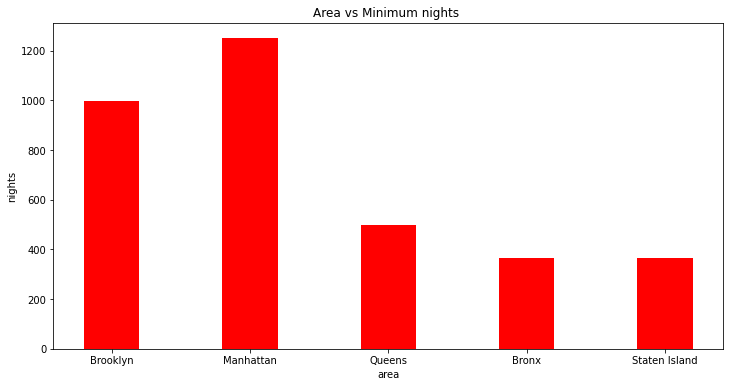

In [ ]:
area = areas_minimum_nights['neighbourhood_group']
nights = areas_minimum_nights['minimum_nights']

fig = plt.figure(figsize = (12,6))
# Creating  the bar plot
plt.bar(area,nights, color = 'red',width=0.4)
 
plt.xlabel("area")
plt.ylabel("nights")
plt.title("Area vs Minimum nights ")
plt.show()

In [ ]:
price_area = new_df.groupby(['price'])['minimum_nights'].max().reset_index()
price_area.head(5)

,price,minimum_nights
0,0,30
1,10,30
2,11,7
3,12,300
4,13,1


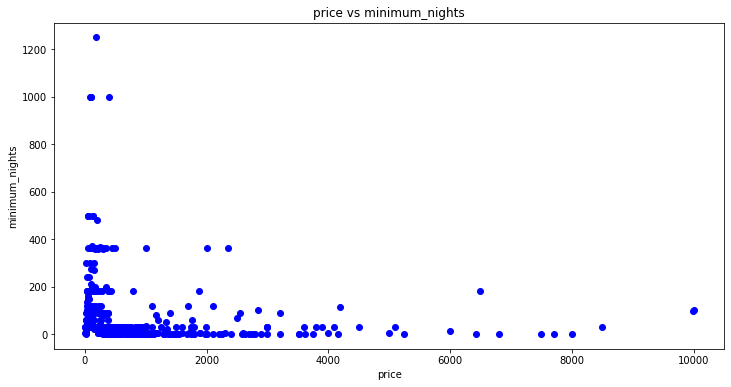

In [ ]:
area = price_area['price']
price = price_area['minimum_nights']

fig = plt.figure(figsize = (12,6))

#creating the bar plot
plt.scatter(area, price, color = 'blue' )

plt.xlabel("price")
plt.ylabel("minimum_nights")
plt.title("price vs minimum_nights")
plt.show()

# From the above Analysis we can say that most people prefer to stay in nights where price is less.


# 3.Which hosts are the busiest and why?

In [ ]:
busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


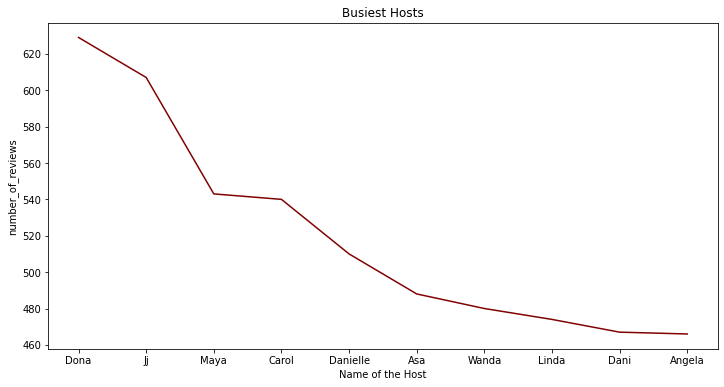

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

plt.rcParams['figure.figsize'] = (12,6) 
# creating the bar plot
plt.plot(name, reviews, color ='maroon')
        
 
plt.xlabel("Name of the Host")
plt.ylabel("number_of_reviews")
plt.title("Busiest Hosts")
plt.show()

# Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

# Busiest hosts are:
1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle
6. Asa
7. Wanda
8. Linda
9. Dani
10. Angela

# 4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


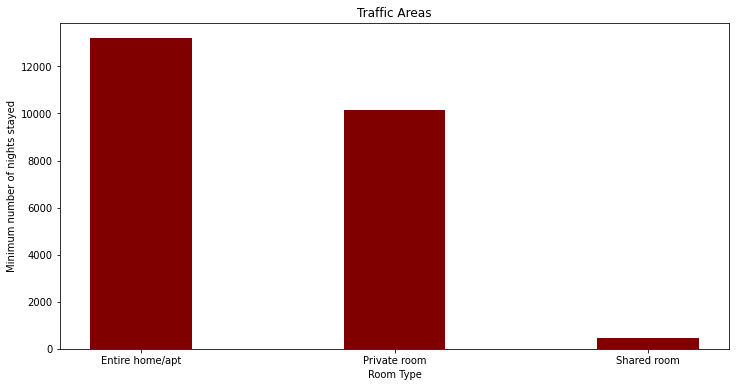

In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (12, 6))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='maroon',width = 0.4)
      
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

# From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

# 5.Which neighbourhood group has the highest price for the listings as an average price?

In [ ]:
import seaborn as sns

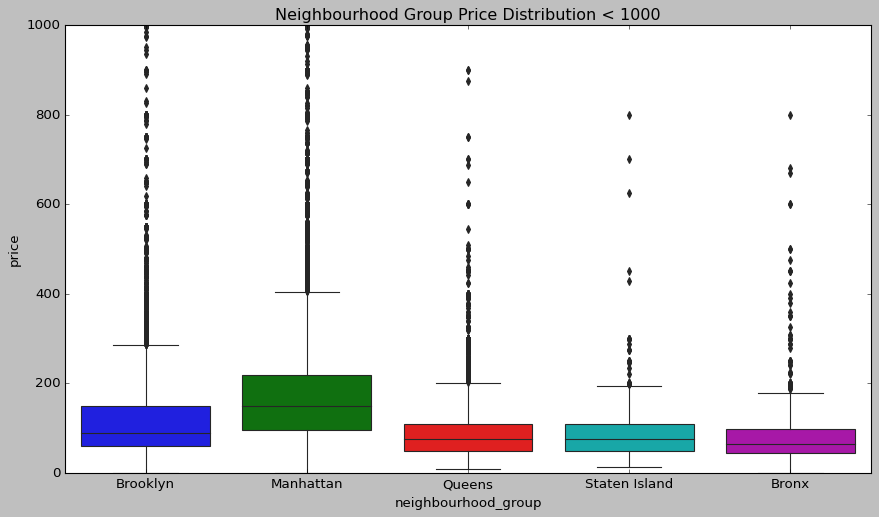

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 1000")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = new_df[new_df.price<1000])
plt.show()

# From the boxplot above, 

# We can state that Manhattan has the highest range price for the listings with  about $ 140 as an average price

#6. Which neighbourhood has the highest last review on the basis of  date?

In [ ]:
highest_last_reviews = new_df.groupby(['neighbourhood','last_review'])['number_of_reviews'].max().reset_index()
highest_last_reviews = highest_last_reviews.sort_values(by= 'number_of_reviews',ascending = False)
highest_last_reviews.head(10)

,neighbourhood,last_review,number_of_reviews
9640,Jamaica,2019-07-05,629
8781,Harlem,2019-06-21,607
8783,Harlem,2019-06-23,597
8775,Harlem,2019-06-15,594
9632,Jamaica,2019-06-27,576
4663,East Elmhurst,2019-07-01,543
10734,Lower East Side,2019-07-06,540
4668,East Elmhurst,2019-07-06,510
12332,Park Slope,2019-07-01,488
2448,Bushwick,2019-07-07,480


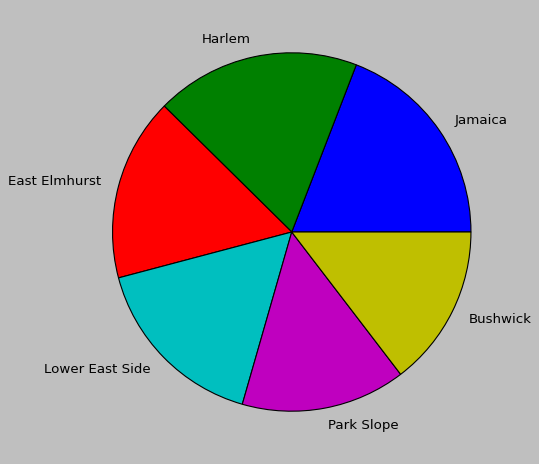

In [ ]:
neighbourhood = ['Jamaica','Harlem','East Elmhurst','Lower East Side','Park Slope','Bushwick']
number_of_reviews = [629,607,543,540,488,480]
#creating plot
fig = plt.figure(figsize =(10,7))
plt.pie(number_of_reviews , labels = neighbourhood)
plt.show()

From the above piechart,

we can see that jamaica has the highest number of reviews in comparison of all neighbourhood as per last reviews on date : 2019-07-05

CONCLUSION:-

* AFTER DOING ANALYSIS OF AIRBNB BOOKING 2019 BOOKING DATA WE GET A CONCLUSION

* MANHATTAN HAS A MAXIMUM HOST LISTING COUNT.

* BROOKLYN NEIGHBOURHOOD GROUP HAS A MAXIMUN NIGHT .

* DONA IS A BUSIEST HOST IN PRIVATE ROOM TYPE.
* MANHATTAN GROUP HAS A HIGHEST TRAFFIC IN ENTIRE HOME/APT ROOM TYPE.
* MANHATTAN GROUP ALSO HAS A HIGHEST PRICE IN COMPARISON OF OTHER GROUP WITH MAXIMUM NIGHT STAYS.
* JAMAICA HAS A MAXIMUM NO. OF REVIEWS IN COMPARISON WITH OTHER .